In this notebook we show how VCL model predicts digits from MNIST datasets. We use VCL model which was trained on Permutted MNIST dataset and try to predict 10 digits from there.

In [1]:
import vcl_model
import torch
import gzip
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = vcl_model.VCL(784, 100, 10)
model.load_state_dict(torch.load('../vcl/my_model.pth', map_location='cpu'))

Download dataset and take 10 images from it.

In [3]:
f = gzip.open('../mnist/mnist.pkl.gz', 'rb')
a, b, c = pickle.load(f, encoding='latin1')
f.close()
X = np.vstack((a[0], b[0], c[0]))
x_set = X[:10]

Plot 10 chosen images and predict, which digit is on the picture.

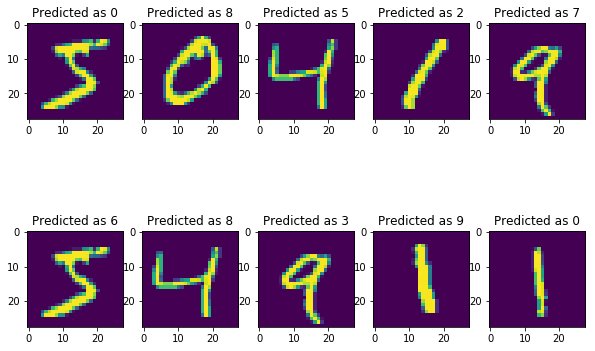

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 7))

for i in range(2):
  
  for j in range(5):
  
    x = x_set[i*j + j]
    xx = Variable(torch.from_numpy(x))
    pred = model.forward(xx)
    y = np.argmax(pred.detach().cpu().numpy())
    axes[i][j].imshow(x.reshape(28, 28))
    axes[i][j].set_title('Predicted as {}'.format(y))
    